In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
os.path

<module 'posixpath' from '/usr/lib/python3.9/posixpath.py'>

| tweet_id            | date       | time     | lang | country_code |
| ------------------- | ---------- | -------- | ---- | ------------ |
| 1395954198999621633 | 2021-05-22 | 04:06:31 | en   | NaN          |
| 1396315437017833472 | 2021-05-23 | 04:01:57 | en   | NaN          |
| 1396315419518980099 | 2021-05-23 | 04:01:52 | en   | NaN          |

# Data Ingestion

## Requirement

In [ ]:
from IPython.display import clear_output
!pip install twarc #Twarc
!pip install tweepy # Tweepy 3.8.0
!pip install argparse #Argparse 3.2
!pip install xtract #Xtract 0.1 a3
!pip install wget #Wget 3.2
clear_output()

In [ ]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np
import pandas as pd

## Load Raw Data

In [ ]:


dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-08-22/2020-08-22_clean-dataset.tsv.gz?raw=true"


#Downloads the dataset (compressed in a GZ format)
#!wget dataset_URL -O clean-dataset.tsv.gz
wget.download(dataset_URL, out='clean-dataset.tsv.gz')

#Unzips the dataset and gets the TSV dataset
with gzip.open('clean-dataset.tsv.gz', 'rb') as f_in:
    with open('clean-dataset.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

#Deletes the compressed GZ file
os.unlink("clean-dataset.tsv.gz")

#Gets all possible languages from the dataset
df = pd.read_csv('clean-dataset.tsv',sep="\t")
# lang_list = df.lang.unique()
# lang_list= sorted(np.append(lang_list,'all'))
# lang_picker = widgets.Dropdown(options=lang_list, value="all")
# lang_picker
# os.unlink("clean-dataset.tsv")

In [ ]:

df

,tweet_id,date,time,lang,country_code
0,1297021272451354624,2020-08-22,04:02:23,fr,NaN
1,1297021272946286597,2020-08-22,04:02:23,es,NaN
2,1297021274494033924,2020-08-22,04:02:23,es,NaN
3,1297021275299287040,2020-08-22,04:02:24,en,NaN
4,1297021276352061440,2020-08-22,04:02:24,en,NaN
...,...,...,...,...,...
458713,1297383708127899648,2020-08-23,04:02:34,en,NaN
458714,1297383708786221056,2020-08-23,04:02:35,en,NaN
458715,1297383708815552514,2020-08-23,04:02:35,und,NaN
458716,1297383709637713922,2020-08-23,04:02:35,in,NaN


### Filter by language

In [ ]:
#Creates a new clean dataset with the specified language (if specified)
filtered_language = lang_picker.value

#If no language specified, it will get all records from the dataset
if filtered_language == "":
  copyfile('clean-dataset.tsv', 'clean-dataset-filtered.tsv')

#If language specified, it will create another tsv file with the filtered records
else:
  filtered_tw = list()
  current_line = 1
  with open("clean-dataset.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
      filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

      for line in tsvreader:
        if line[3] == filtered_language:
          filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
        current_line += 1

  print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
  print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

  with open('clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)

Showing first 5 tweets from the filtered dataset
['1351757442653294592\t2021-01-20\t05:04:23\ten\tNULL\n', '1351757444033069056\t2021-01-20\t05:04:23\ten\tNULL\n', '1351757446860083202\t2021-01-20\t05:04:24\ten\tNULL\n', '1351757447619375106\t2021-01-20\t05:04:24\ten\tNULL\n', '1351757448219140105\t2021-01-20\t05:04:24\ten\tNULL\n']


In [ ]:
# df.groupby('lang').count().sort_values(by='tweet_id', ascending=False)
df

,tweet_id,date,time,lang,country_code
0,1351757442653294592,2021-01-20,05:04:23,en,NaN
1,1351757444033069056,2021-01-20,05:04:23,en,NaN
2,1351757446860083202,2021-01-20,05:04:24,en,NaN
3,1351757447438991366,2021-01-20,05:04:24,ur,NaN
4,1351757447619375106,2021-01-20,05:04:24,en,NaN
...,...,...,...,...,...
424643,1352119926430068736,2021-01-21,05:04:46,in,NaN
424644,1352119926945792002,2021-01-21,05:04:46,und,NaN
424645,1352119928959213574,2021-01-21,05:04:46,und,NaN
424646,1352119929072443397,2021-01-21,05:04:46,in,NaN


## Load Top 1000 terms

In [ ]:
dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_top1000terms.csv?raw=true"
df = pd.read_csv(dataset_URL, on_bad_lines='skip', names=["gram", "counts"])
df['date'] = date
df

,gram,counts,date
0,covid,152625,2020-01-01
1,19,140599,2020-01-01
2,covid19,103742,2020-01-01
3,coronavirus,72760,2020-01-01
4,vaccine,25874,2020-01-01
...,...,...,...
996,rest,752,2020-01-01
997,looks,752,2020-01-01
998,super,751,2020-01-01
999,behind,750,2020-01-01


## Load Top 1000 bigrams (3)

In [ ]:
dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_top1000bigrams.csv?raw=true"
df = pd.read_csv(dataset_URL, on_bad_lines='skip')
df

,gram,counts
0,covid 19 vaccine,10255
1,covid 19 pandemic,3998
2,covid 19 cases,3084
3,covid 19 vaccines,3011
4,vacuna covid 19,2413
...,...,...
995,hundreds thousands people,112
996,thing ve ever,112
997,series executive actions,112
998,executive actions reverse,112


## Load Top 1000 trigrams (2)

In [ ]:
dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_top1000trigrams.csv?raw=true"
df = pd.read_csv(dataset_URL, on_bad_lines='skip')
df

NameError: ignored

## Load all data

In [ ]:
base_url = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/"
raw = "_clean-dataset.tsv.gz?raw=true"
terms = "_top1000terms.csv?raw=true"
bi = "_top1000trigrams.csv?raw=true"
tri = "_top1000bigrams.csv?raw=true"
date = "2020-01-01"
print(base_url + date + "/" + date + raw)
print(base_url + date + "/" + date + terms)
print(base_url + date + "/" + date + bi)
print(base_url + date + "/" + date + tri)

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-01-01/2020-01-01_clean-dataset.tsv.gz?raw=true
https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-01-01/2020-01-01_top1000terms.csv?raw=true
https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-01-01/2020-01-01_top1000trigrams.csv?raw=true
https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-01-01/2020-01-01_top1000bigrams.csv?raw=true


## query all data

In [ ]:
from datetime import datetime, timedelta, date

def generate_date():
    """
    Generate all the date between 2020-01-01 and 2022-12-31 (Covid period)
    return a list of %Y-%m-%d
    """
    start_date = date(2020, 1, 1)
    end_date = date(2022, 12, 31)
    delta = end_date - start_date
    all_dates = [start_date + timedelta(days=i) for i in range(delta.days + 1)]
    all_dates = list(map(lambda x : x.strftime("%Y-%m-%d"), all_dates))
    return all_dates

all_dates = generate_date()
raw_data = pd.DataFrame([])
terms_data = pd.DataFrame([])
bigram_data = pd.DataFrame([])
trigram_data = pd.DataFrame([])

In [ ]:
def read_raw_data(dataset_URL:str):
    #Downloads the dataset (compressed in a GZ format)
    #!wget dataset_URL -O clean-dataset.tsv.gz
    try:
        wget.download(dataset_URL, out='clean-dataset.tsv.gz')

        #Unzips the dataset and gets the TSV dataset
        with gzip.open('clean-dataset.tsv.gz', 'rb') as f_in:
            with open('clean-dataset.tsv', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        #Deletes the compressed GZ file
        os.unlink("clean-dataset.tsv.gz")

        #Gets all possible languages from the dataset
        df = pd.read_csv('clean-dataset.tsv',sep="\t")
        os.unlink("clean-dataset.tsv")
        # return df
        return df[df.lang=="en"]
    except:
        return pd.DataFrame([])
    

def read_term_data(dataset_URL:str, date:str):
    try:
        df = pd.read_csv(dataset_URL, on_bad_lines='skip', names=["gram", "counts"])
        df['date'] = date
        return df
    except:
        return pd.DataFrame([])

def read_bigram_data(dataset_URL:str, date:str):
    try:
        df = pd.read_csv(dataset_URL, on_bad_lines='skip')
        df['date'] = date
        return df
    except:
        return pd.DataFrame([])

def read_trigram_data(dataset_URL:str, date:str):
    try:
        df = pd.read_csv(dataset_URL, on_bad_lines='skip')
        df['date'] = date
        return df
    except:
        return pd.DataFrame([])

In [ ]:
# for date in all_dates:
for date in ['2021-05-22']:
    print(date)
    raw_data_url = base_url + date + "/" + date + raw
    raw_data = read_raw_data(raw_data_url)
    # raw_data.to_csv("/content/RBDA/raw_data_en.csv", mode='a', encoding='utf-8')
    raw_data = pd.concat([raw_data, read_raw_data(raw_data_url)], axis=0)
    
    terms_data_url = base_url + date + "/" + date + terms
    terms_data = pd.concat([terms_data, read_term_data(terms_data_url, date)], axis=0)

    bigram_data_url = base_url + date + "/" + date + bi
    bigram_data = pd.concat([bigram_data, read_bigram_data(bigram_data_url, date)], axis=0)

    trigram_data_url = base_url + date + "/" + date + tri
    trigram_data = pd.concat([trigram_data, read_trigram_data(trigram_data_url, date)], axis=0)

# raw_data.to_csv("/content/RBDA/raw_data.csv", header=True, encoding='utf-8')
# terms_data.to_csv("/content/RBDA/terms_data.csv", header=True, encoding='utf-8')
# bigram_data.to_csv("/content/RBDA/bigram_data.csv", header=True, encoding='utf-8')
# trigram_data.to_csv("/content/RBDA/trigram_data.csv", header=True, encoding='utf-8')

2021-05-22


In [ ]:
read_raw_data(raw_data_url)

,tweet_id,date,time,lang,country_code
0,1395954198999621633,2021-05-22,04:06:31,en,NaN
1,1395954202728337408,2021-05-22,04:06:32,en,NaN
2,1395954203193905154,2021-05-22,04:06:32,en,NaN
7,1395954208919023618,2021-05-22,04:06:33,en,NaN
8,1395954211586641926,2021-05-22,04:06:34,en,NaN
...,...,...,...,...,...
221218,1396315419518980099,2021-05-23,04:01:52,en,NaN
221220,1396315430671687681,2021-05-23,04:01:55,en,NaN
221222,1396315437017833472,2021-05-23,04:01:57,en,NaN
221223,1396315438770966532,2021-05-23,04:01:57,en,NaN


In [ ]:
bigram_data

,gram,counts,date
0,covid 19 pandemic,8506,2020-05-22
1,covid 19 cases,5627,2020-05-22
2,penyebaran covid 19,3681,2020-05-22
3,covid 19 patients,3377,2020-05-22
4,covid 19 crisis,3180,2020-05-22
...,...,...,...
995,fact check,103,2021-05-22
996,state india,103,2021-05-22
997,coronavirus salutetocoronawarriors,103,2021-05-22
998,offline exam,103,2021-05-22


In [ ]:
print(terms_data.shape)
print(bigram_data.shape)
print(trigram_data.shape)


(1005004, 3)
(1004004, 3)
(1005004, 3)


In [ ]:
!zip -r RBDA.zip /content/RBDA

  adding: content/RBDA/ (stored 0%)
  adding: content/RBDA/terms_data.csv (deflated 73%)
  adding: content/RBDA/raw_data_en.csv (deflated 77%)
  adding: content/RBDA/.ipynb_checkpoints/ (stored 0%)
  adding: content/RBDA/trigram_data.csv (deflated 75%)
  adding: content/RBDA/bigram_data.csv (deflated 73%)


In [ ]:
import os

# file_path = "/content/RBDA/raw_data_en.csv"
file_path = "/content/RBDA.zip"
file_size = os.path.getsize(file_path)
print("Size of file at {}: {} Gbytes".format(file_path, file_size/1024/1024/1024
))

Size of file at /content/RBDA.zip: 1.328616637736559 Gbytes


# Analytics

## Covid Case and twitter number relation


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
case_cnt = pd.read_csv("/content/drive/MyDrive/RBDA_Project/covid_cast_cnt.csv",
                       delimiter='\t', names=['date', 'case_cnt'], error_bad_lines=False)
twitter_cnt = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_cnt.csv",
                           names=['date', 'twitter_cnt'], error_bad_lines=False)


<ipython-input-3-22e6891d1e65>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  case_cnt = pd.read_csv("/content/drive/MyDrive/RBDA_Project/covid_cast_cnt.csv",
<ipython-input-3-22e6891d1e65>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  twitter_cnt = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_cnt.csv",


In [ ]:
case_cnt['date'] = pd.to_datetime(case_cnt['date'], format='%Y-%m-%d', errors='coerce')
case_cnt['case_cnt'] = case_cnt['case_cnt'].apply(lambda x : int(x))
twitter_cnt['date'] = pd.to_datetime(twitter_cnt['date'], format='%Y-%m-%d', errors='coerce')
twitter_cnt['twitter_cnt'] = twitter_cnt['twitter_cnt'].apply(lambda x : int(x))
df_ana = pd.merge(case_cnt, twitter_cnt, on = 'date', how='inner')
df_ana = df_ana[df_ana.date.notnull()].sort_values(by='date')

In [ ]:
twitter_cnt_us = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_us_csv.csv", 
                             names=['date', 'twitter_cnt'], error_bad_lines=False)
twitter_cnt_us['date'] = pd.to_datetime(twitter_cnt_us['date'], format='%Y-%m-%d', errors='coerce')
twitter_cnt_us = twitter_cnt_us[pd.to_numeric(twitter_cnt_us['twitter_cnt'], errors='coerce').notnull()].astype({'twitter_cnt': int})
df_ana_us = pd.merge(case_cnt, twitter_cnt_us, on = 'date', how='inner')
df_ana_us = df_ana_us[df_ana_us.date.notnull()].sort_values(by='date')

<ipython-input-5-9584d5c2501b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  twitter_cnt_us = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_us_csv.csv",


In [ ]:
df_ana_us.describe()

,case_cnt,twitter_cnt
count,866.000000,866.000000
mean,102622.500000,1470.919169
std,113146.443907,1725.698246
min,8777.000000,19.000000
25%,45632.750000,233.500000
50%,71517.000000,787.000000
75%,116568.250000,1910.500000
max,906632.000000,12692.000000


In [ ]:
df_ana.describe()

,case_cnt,twitter_cnt
count,866.000000,866.000000
mean,102622.500000,137696.215935
std,113146.443907,111831.139087
min,8777.000000,2190.000000
25%,45632.750000,39011.750000
50%,71517.000000,115067.000000
75%,116568.250000,192964.750000
max,906632.000000,616918.000000


### Descriptive analytics

We
shifted our focus to collect exclusively COVID-19 tweets on March 12th, 2020 with the following keywords:
“COVD19”, “CoronavirusPandemic”, “COVID-19”, “2019nCoV”, “CoronaOutbreak”, “coronavirus”,
“WuhanVirus”, thus the number of tweets gathered dramatically expanded the dataset. Please note that the Stream
API only allows free access to a one percent sample of the daily stream of Twitter.
[data_scource](https://arxiv.org/pdf/2004.03688.pdf)

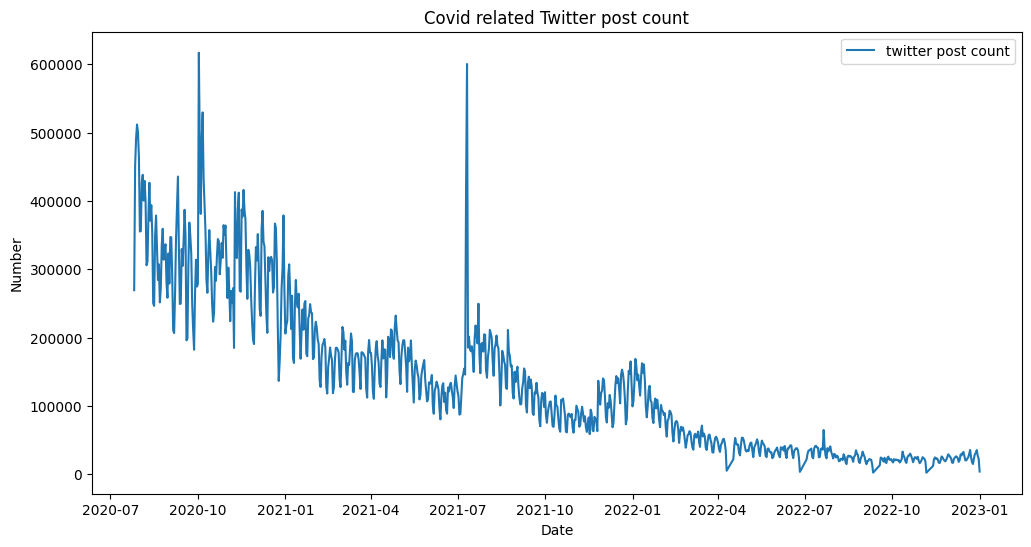

In [ ]:
plt.figure(figsize=(12, 6))
# plt.plot(df_ana.date, df_ana.case_cnt, label='covid case count')
plt.plot(df_ana.date, df_ana.twitter_cnt, label='twitter post count')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Covid related Twitter post count')
plt.legend()
plt.show()

Based on the chat content, we can infer that COVID-related Twitter posts exhibit a decreasing trend, albeit with some noticeable peaks and valleys.

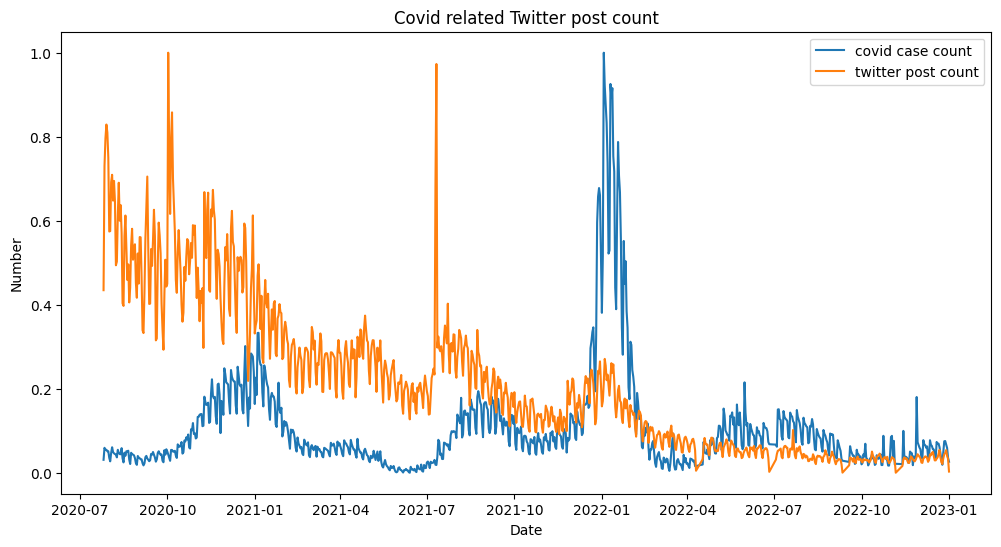

In [ ]:
df_ana['case_norm'] = (df_ana.case_cnt - df_ana.case_cnt.min()) \
/ (df_ana.case_cnt.max() - df_ana.case_cnt.min())
df_ana['twitter_norm'] = (df_ana.twitter_cnt - df_ana.twitter_cnt.min()) \
/ (df_ana.twitter_cnt.max() - df_ana.twitter_cnt.min())
plt.figure(figsize=(12, 6))
plt.plot(df_ana.date, df_ana.case_norm, label='covid case count')
plt.plot(df_ana.date, df_ana.twitter_norm, label='twitter post count')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Covid related Twitter post count')
plt.legend()
plt.show()

In [ ]:
# df_ana[['case_norm', 'twitter_norm']].corr()
corr, pval = pearsonr(df_ana['case_norm'], df_ana['twitter_norm'])

# print the correlation coefficient and p-value
print('Correlation coefficient:', corr)
print('P-value:', pval)

Correlation coefficient: 0.09210763071998052
P-value: 0.006680099984805526


### US

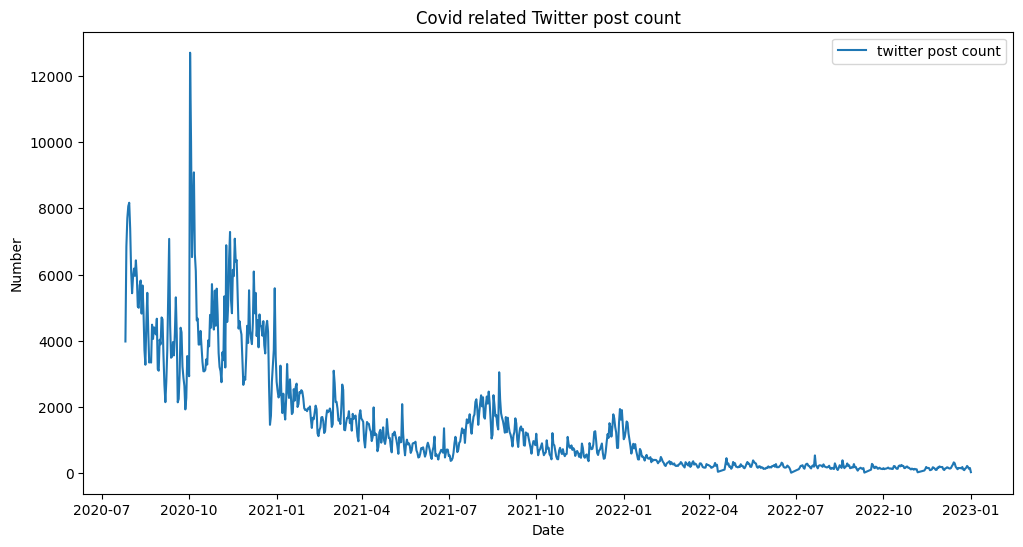

In [ ]:
plt.figure(figsize=(12, 6))
# plt.plot(df_ana.date, df_ana.case_cnt, label='covid case count')
plt.plot(df_ana_us.date, df_ana_us.twitter_cnt, label='twitter post count')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Covid related Twitter post count')
plt.legend()
plt.show()

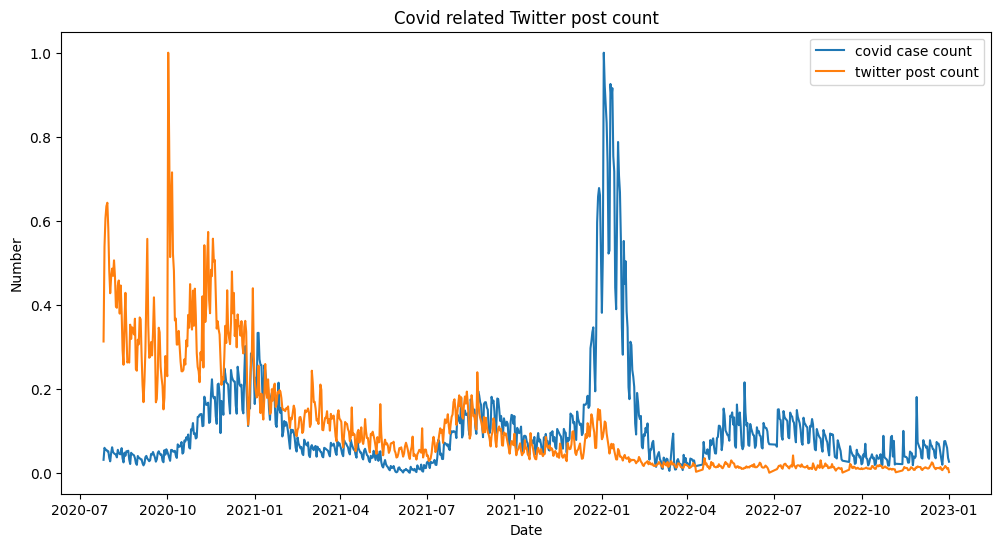

In [ ]:
df_ana_us['case_norm'] = (df_ana_us.case_cnt - df_ana_us.case_cnt.min()) \
/ (df_ana_us.case_cnt.max() - df_ana_us.case_cnt.min())
df_ana_us['twitter_norm'] = (df_ana_us.twitter_cnt - df_ana_us.twitter_cnt.min()) \
/ (df_ana_us.twitter_cnt.max() - df_ana_us.twitter_cnt.min())
plt.figure(figsize=(12, 6))
plt.plot(df_ana_us.date, df_ana_us.case_norm, label='covid case count')
plt.plot(df_ana_us.date, df_ana_us.twitter_norm, label='twitter post count')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Covid related Twitter post count')
plt.legend()
plt.show()

In [ ]:
df_ana_us[df_ana_us.date.between('2020-11-01','2021-12-31')][['case_norm', 'twitter_norm']].corr().loc['twitter_norm', 'case_norm']

0.46657239527285743

In [ ]:
# df_ana[['case_norm', 'twitter_norm']].corr()
corr, pval = pearsonr(df_ana_us[df_ana_us.date.between('2020-11-01','2021-12-31')]['case_norm'], df_ana_us[df_ana_us.date.between('2020-11-01','2021-12-31')]['twitter_norm'])

# print the correlation coefficient and p-value
print('Correlation coefficient:', corr)
print('P-value:', pval)

Correlation coefficient: 0.4665723952728577
P-value: 2.050400320538178e-24


As can be seen from the graph, the popularity of Covid has been declining since January 2021, despite a few spikes caused by outbreaks during that period. Covid is gradually becoming less discussed on Twitter. Therefore, the analysis that follows will focus on data from July 2020 to January 2022.


In [ ]:
df_ana_us_tiny = df_ana_us[df_ana_us.date.between('2020-11-01','2021-12-31')]fin
for i in range(30):
    shift = df_ana_us_tiny ['case_norm'].shift(i)
    corr = df_ana_us_tiny ['twitter_norm'].corr(shift)
    print(f'Lag: {i}, Correlation: {corr}')

Lag: 0, Correlation: 0.46657239527285777
Lag: 1, Correlation: 0.46808162463917236
Lag: 2, Correlation: 0.44686342311646243
Lag: 3, Correlation: 0.4506334902400078
Lag: 4, Correlation: 0.46365758955608266
Lag: 5, Correlation: 0.48314527801121404
Lag: 6, Correlation: 0.515056759260298
Lag: 7, Correlation: 0.5531194592833942
Lag: 8, Correlation: 0.5441749973122304
Lag: 9, Correlation: 0.5127363978692411
Lag: 10, Correlation: 0.4939058242759575
Lag: 11, Correlation: 0.4795452322889262
Lag: 12, Correlation: 0.4854522725820247
Lag: 13, Correlation: 0.5244927547854797
Lag: 14, Correlation: 0.5554231615857153
Lag: 15, Correlation: 0.5416254536471643
Lag: 16, Correlation: 0.505695346385178
Lag: 17, Correlation: 0.48646593225071794
Lag: 18, Correlation: 0.4696436799671817
Lag: 19, Correlation: 0.47356642774950536
Lag: 20, Correlation: 0.5089395770931502
Lag: 21, Correlation: 0.5443613696007887
Lag: 22, Correlation: 0.5223032589836298
Lag: 23, Correlation: 0.47732676557090603
Lag: 24, Correlation

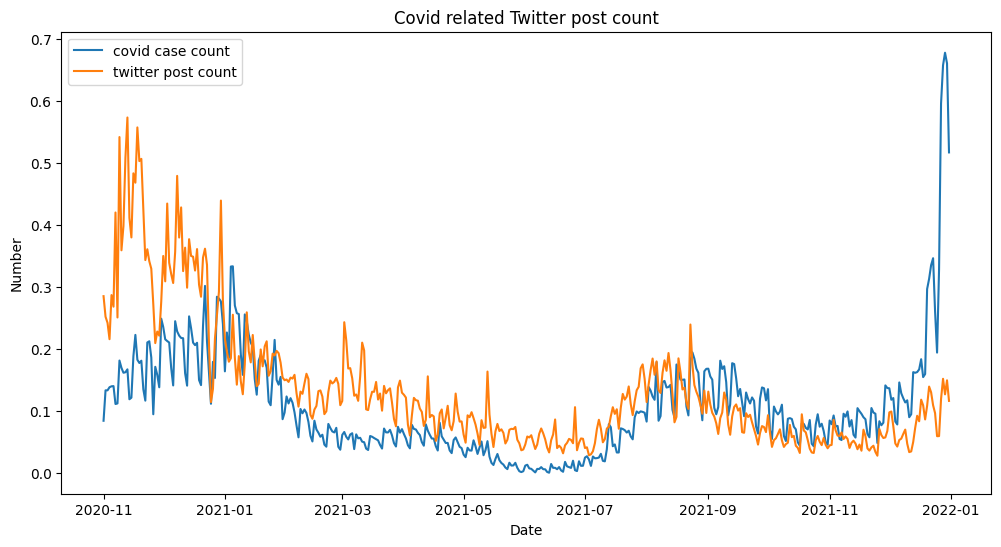

In [ ]:
df_ana_us_selected = df_ana_us[df_ana_us.date.between('2020-11-01','2021-12-31')]
plt.figure(figsize=(12, 6))
plt.plot(df_ana_us_selected.date, df_ana_us_selected.case_norm, label='covid case count')
plt.plot(df_ana_us_selected.date, df_ana_us_selected.twitter_norm, label='twitter post count')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Covid related Twitter post count')
plt.legend()
plt.show()

一个有趣的发现是，通常twitter的波峰来的比covid case的前一些，这里提出来个猜测。
1. 人民在感染了covid后，有了症状后，会先在twitter等平台搜索相关信息，在病情变严重了再去做核酸检测或者寻求医生帮助。
2. 互联网信息的传播比covid的传播更加的快，当一个人感染，周围的人也会搜索covid对应的信息，而且速度比covid传播更快。
但目前现有的数据无法论证这两个猜测。

## Gram

In [5]:
gram = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_gram.csv")
gram = gram[pd.to_numeric(gram['cnt'], errors='coerce').notnull()].astype({'cnt': int})
gram['gram'] = gram['gram'].apply(lambda x : str(x));
gram = gram[gram.notnull()]

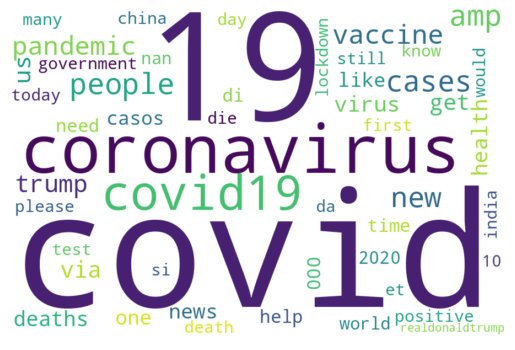

In [8]:
from wordcloud import WordCloud

# gram_dict = {}
# for i in gram.values:
#     test_dict[str(i[0])] = int(i[1])

# Create a dictionary from the two lists
gram_dict = dict(zip(gram['gram'], gram['cnt']))


# Create a WordCloud object
wordcloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=50,                 
    random_state=42          
)

# Generate a word cloud from the dictionary
wordcloud.fit_words(gram_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [9]:
bigram = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_bigram.csv")
bigram = bigram[pd.to_numeric(bigram['cnt'], errors='coerce').notnull()].astype({'cnt': int})
bigram['gram'] = bigram['gram'].apply(lambda x : str(x));
bigram = bigram[bigram.notnull()]



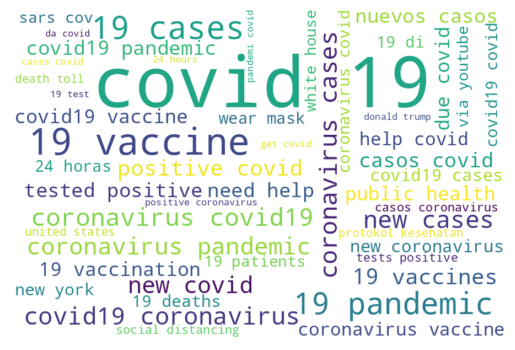

In [10]:
bigram_dict = dict(zip(bigram['gram'], bigram['cnt']))


# Create a WordCloud object
wordcloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=50,
    random_state=42           
)

# Generate a word cloud from the dictionary
wordcloud.fit_words(bigram_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
trigram = pd.read_csv("/content/drive/MyDrive/RBDA_Project/twitter_trigram.csv")
trigram = trigram[pd.to_numeric(trigram['cnt'], errors='coerce').notnull()].astype({'cnt': int})
trigram['gram'] = trigram['gram'].apply(lambda x : str(x));
trigram = trigram[trigram.notnull()]



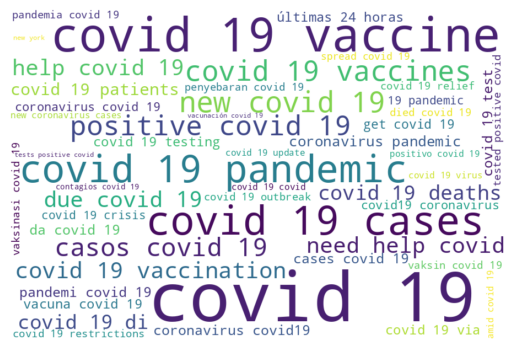

In [12]:
trigram_dict = dict(zip(trigram['gram'], trigram['cnt']))


# Create a WordCloud object
wordcloud = WordCloud(
    background_color='white',
    width=900, height=600,
    max_words=50,
    random_state=42           
)

# Generate a word cloud from the dictionary
wordcloud.fit_words(trigram_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()